In [ ]:
import warnings

import df_utils as utils
from df_model import (
    CLF_DECISION_TREE,
    CLF_LOGISTIC_REGRESSION,
    CLF_SUPPORT_VECTOR,
    PIPE_CLASSIFIER,
    PIPE_ENCODER,
    PIPE_IMPUTER,
    PIPE_SCALER,
    PIPE_SELECTOR,
    PIPE_TRANSFORMER,
    DataModel,
)
# from sklearnex import patch_sklearn # pip install scikit-learn-intelex

In [ ]:
############ PRODUCTION SETTINGS ############

# optimize scikit runtime for intel processor
# patch_sklearn() # uncomment if installed

# ignore unproblematic parameter warnings
warnings.filterwarnings("ignore")

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
%%capture
# run preprocessing notebook
%run df2_abalone_prep.ipynb

In [4]:
############ CONFIGURATION ############

# list desired settings
data_config = {
    "dataset": "abalone",
    "index": None,
    "target": "rings",
    "has_imbalance": False,
    "has_test": False,
    "use_raw": False,
    "n_folds": 10,
    "scoring": "f1_weighted",
    "cv_random": False,
    "cv_iter": 10,
}

# choose desired final classifiers and pipeline modelling steps
final_models = {
    CLF_LOGISTIC_REGRESSION: [PIPE_ENCODER, PIPE_IMPUTER, PIPE_TRANSFORMER, PIPE_SCALER, PIPE_SELECTOR, PIPE_CLASSIFIER],
    CLF_SUPPORT_VECTOR: [PIPE_ENCODER, PIPE_IMPUTER, PIPE_TRANSFORMER, PIPE_SCALER, PIPE_SELECTOR, PIPE_CLASSIFIER],
    CLF_DECISION_TREE: [PIPE_ENCODER, PIPE_IMPUTER, PIPE_TRANSFORMER, PIPE_SCALER, PIPE_SELECTOR],
}

# pipeline steps: encoders, imputers, transformers, scalers, feature selectors, classifiers
[PIPE_ENCODER, PIPE_IMPUTER, PIPE_TRANSFORMER, PIPE_SCALER, PIPE_SELECTOR, PIPE_CLASSIFIER]

['enc', 'imp', 'trf', 'scl', 'fsl', 'clf']

In [5]:
# import data set
(data, data_test) = utils.import_data(data_config["dataset"], data_config["has_test"], data_config["use_raw"])

importing from: data/data_clean/abalone.csv


In [6]:
# set data index
data = utils.set_data_index(data, data_config["index"])
if data_config["has_test"]:
    data_test = utils.set_data_index(data_test, data_config["index"])

In [7]:
############ MODELLING ############

# create data set model
data_model = DataModel(data, data_config["target"], data_test, data_config["has_imbalance"], data_config["n_folds"])

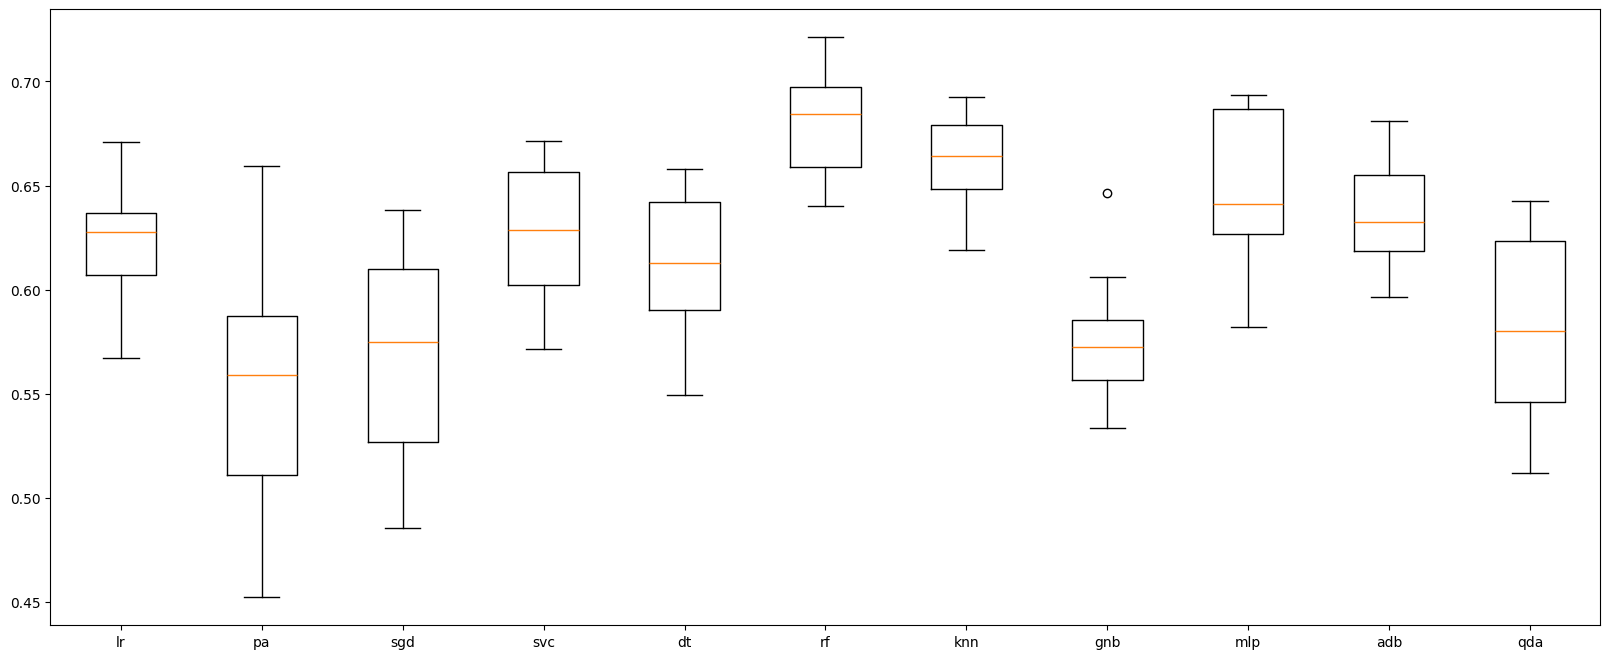

In [8]:
############ CLASSIFIER SELECTION ############

# plot classifier performance on training data out of the box
data_model.plot_models_train_performance(scale=True, encode=True)

In [9]:
# print classifier performance on test data out of the box
data_model.print_models_test_performance(scale=True, encode=True)

lr - accuracy: 0.6424982053122756 / f1: 0.6324063290957002
pa - accuracy: 0.5355348169418521 / f1: 0.5166146435329718
sgd - accuracy: 0.6317300789662599 / f1: 0.6151724456458452
svc - accuracy: 0.6252692031586504 / f1: 0.6288139735270725
dt - accuracy: 0.6101938262742282 / f1: 0.6081971827316975
rf - accuracy: 0.6927494615936827 / f1: 0.6942812705106587
knn - accuracy: 0.6669059583632448 / f1: 0.6688136243771419
gnb - accuracy: 0.5786073223259153 / f1: 0.5724235715096783
mlp - accuracy: 0.6460875807609476 / f1: 0.6398832142638516
adb - accuracy: 0.6331658291457286 / f1: 0.6271401265424653
qda - accuracy: 0.6180904522613065 / f1: 0.6237973139850153


In [10]:
############ HYPERPARAMETER TUNING ############

# tune the parameters of the chosen final classifiers and pipeline steps
optimal_models = {}
for classifier_name, model_steps in final_models.items():
    print(f"---------current model: {classifier_name}---------")
    optimal_models[classifier_name] = data_model.train_model_classifier(classifier_name, model_steps, random=data_config["cv_random"], n_iter=data_config["cv_iter"], performance=data_config["scoring"])

---------current model: lr---------


tuned enc score: 0.39870066974823065
tuned imp score: 0.39870066974823065
tuned trf score: 0.5099689653092356
tuned scl score: 0.5771283696486075
tuned fsl score: 0.5771283696486075
tuned clf score: 0.5774656463046519
---------current model: svc---------
tuned enc score: 0.3446950294722689
tuned imp score: 0.3446950294722689
tuned trf score: 0.43602967550021743
tuned scl score: 0.6186341640487514
tuned fsl score: 0.6186341640487514
tuned clf score: 0.6186341640487514
---------current model: dt---------
tuned enc score: 0.6133027552415677
tuned imp score: 0.6133027552415677
tuned trf score: 0.6247664168062259
tuned scl score: 0.6247664168062259
tuned fsl score: 0.6247664168062259


In [11]:
############ MODEL EVALUATION ############

# display the produced model pipelines
for model in optimal_models.values():
    display(model)

Pipeline(steps=[('enc',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['sex'], dtype='object')),
                                                 ('numerical', 'passthrough',
                                                  Index(['Unnamed: 0', 'length', 'height', 'shucked_weight', 'viscera_weight',
       'shell_weight'],
      dtype='object'))])),
                ('imp', SimpleImputer()),
                ('trf',
                 ColumnTransformer(transformers=[('positive',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  array([0, 1, 2, 3, 4, 5])),
                                                 ('negative', 'passthrough',
                                                  array([], dtype=int64))])),
                ('scl', StandardScaler()), ('fsl', None),
                ('clf',
                 LogisticRegression(C=0.46415888336127786, max_iter=500,
                                    random_state=42))])

Pipeline(steps=[('enc',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['sex'], dtype='object')),
                                                 ('numerical', 'passthrough',
                                                  Index(['Unnamed: 0', 'length', 'height', 'shucked_weight', 'viscera_weight',
       'shell_weight'],
      dtype='object'))])),
                ('imp', SimpleImputer()),
                ('trf',
                 ColumnTransformer(transformers=[('positive',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  array([0, 1, 2, 3, 4, 5])),
                                                 ('negative', 'passthrough',
                                                  array([], dtype=int64))])),
                ('scl', RobustScaler()), ('fsl', None),
                ('clf', SVC(decision_function_shape='ovo', random_state=42))])

Pipeline(steps=[('enc',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['sex'], dtype='object')),
                                                 ('numerical', 'passthrough',
                                                  Index(['Unnamed: 0', 'length', 'height', 'shucked_weight', 'viscera_weight',
       'shell_weight'],
      dtype='object'))])),
                ('imp', SimpleImputer()),
                ('trf',
                 ColumnTransformer(transformers=[('positive',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  array([0, 1, 2, 3, 4, 5])),
                                                 ('negative', 'passthrough',
                                                  array([], dtype=int64))])),
                ('scl', None), ('fsl', None),
                ('clf', DecisionTreeClassifier(random_state=42))])

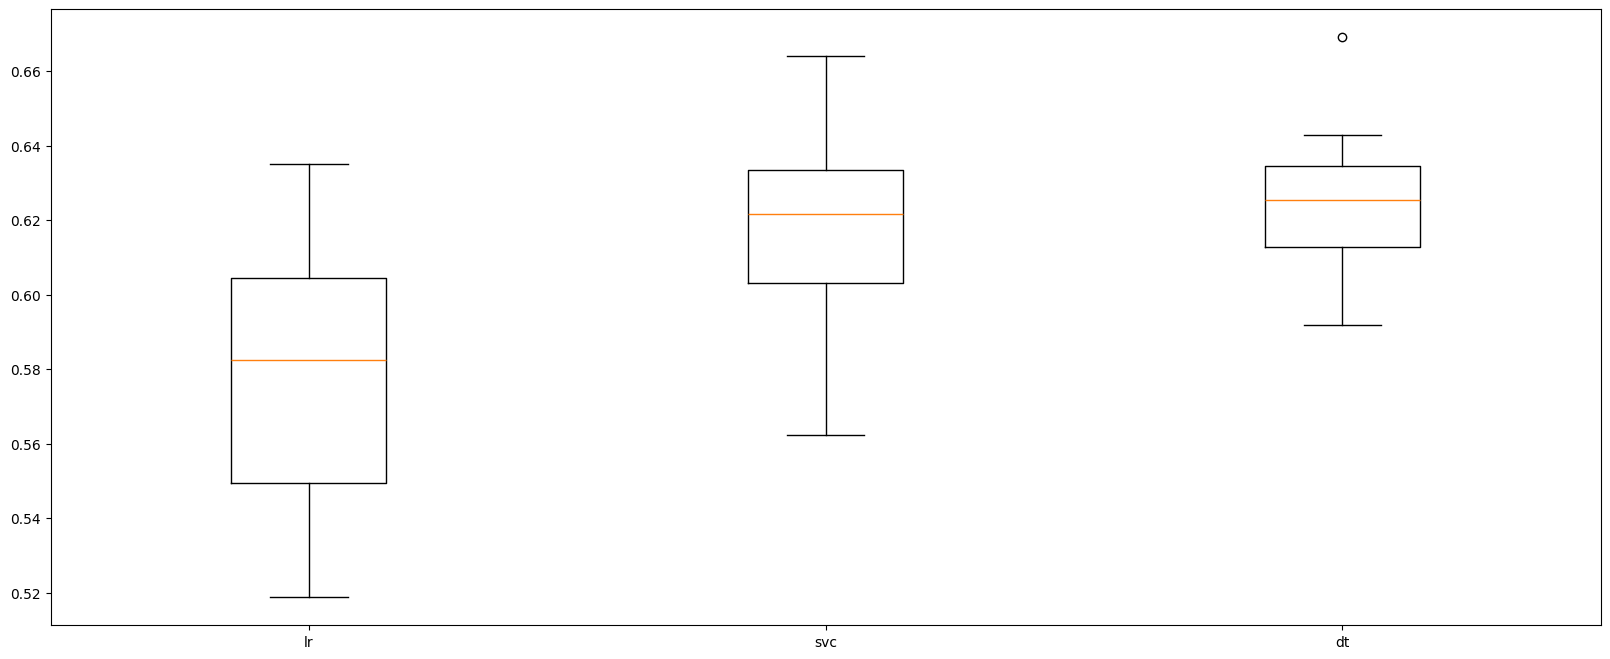

In [12]:
# check for train classifier performance with optimized settings
data_model.plot_models_train_performance(optimal_models)

In [13]:
# check for test classifier performance with optimized settings
data_model.print_models_test_performance(optimal_models)

lr - accuracy: 0.5886575735821967 / f1: 0.5750947000526334
svc - accuracy: 0.6295764536970567 / f1: 0.6314215824812188
dt - accuracy: 0.6116295764536971 / f1: 0.6105090802636348


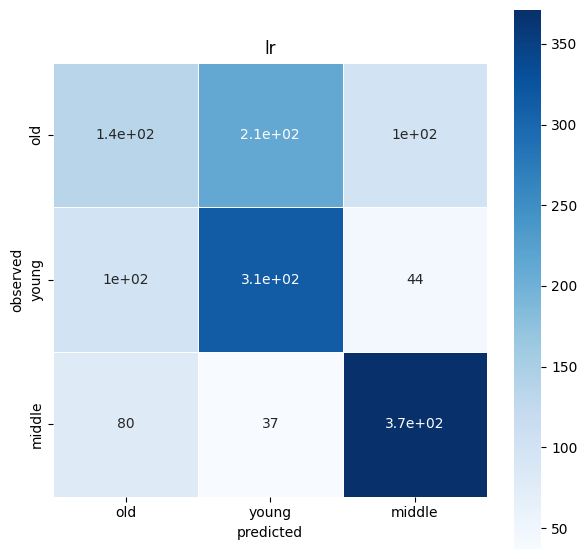

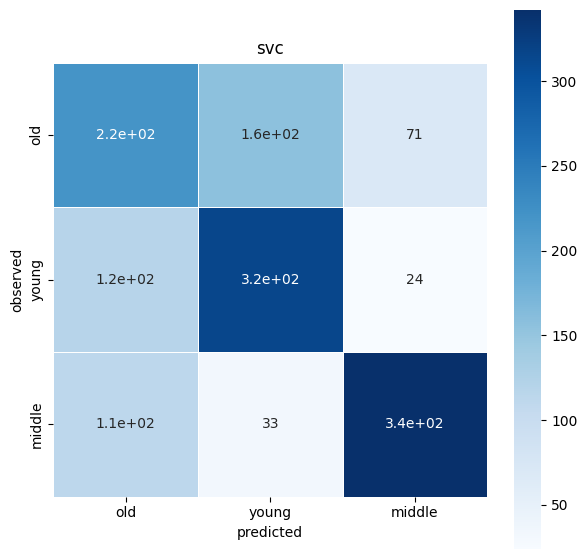

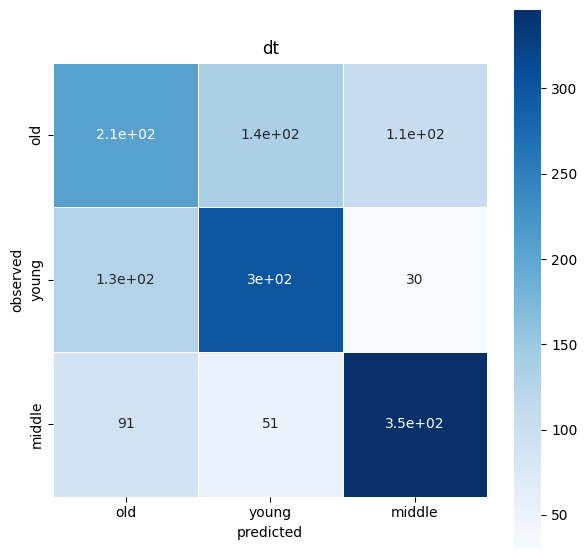

In [14]:
# visualize confusion matrix of models on test data
data_model.plot_models_test_cmatrix(optimal_models)

In [15]:
############ KAGGLE HAND-IN ############

# prepare final prediction on new test data
if data_config["has_test"]:
    for model_name, model in optimal_models.items():
        data_test_fin = data_model.fit_model_newdata(model)
        utils.export_data(data_test_fin, data_config["dataset"] + "_" + model_name, predict=True)

        display(data_test_fin)